In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#column의 이름을 dataset에 설명한 대로 받아온다, 추가적으로 0번째  row는 데이터의 설명이기 때문에 무시.
dataset = pd.read_csv('C:/Users/ksmin/data_Science/dataset/bmi_data_lab2.csv', names= ['gender', 'age', 'height','weight','BMI'], skiprows=1)
dataset.head(20)

,gender,age,height,weight,BMI
0,Female,21,65.783310,112.9925,2.0
1,Female,35,NaN,136.4873,3.0
2,Female,27,69.398740,153.0269,3.0
3,Male,24,68.216600,142.3354,3.0
4,Female,18,67.787810,144.2971,3.0
5,Female,22,68.697840,123.3024,2.0
6,Male,35,69.802040,141.4947,NaN
7,Male,19,70.014720,136.4623,3.0
8,Female,28,67.902650,112.3723,2.0
9,Male,25,NaN,120.6672,3.0


In [64]:
#150 rows, 5 columns, data type과 null값이 있는 지 파악, height과 BMI에 null값이 확인 되었다.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  150 non-null    object 
 1   age     150 non-null    int64  
 2   height  146 non-null    float64
 3   weight  150 non-null    float64
 4   BMI     145 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB


In [65]:
#위에서부터 10개의 데이터를 check한다.
dataset.head(10)

,gender,age,height,weight,BMI
0,Female,21,65.78331,112.9925,2.0
1,Female,35,NaN,136.4873,3.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0
5,Female,22,68.69784,123.3024,2.0
6,Male,35,69.80204,141.4947,NaN
7,Male,19,70.01472,136.4623,3.0
8,Female,28,67.90265,112.3723,2.0
9,Male,25,NaN,120.6672,3.0


In [66]:
#아래에 있는 데이터부터 10개를 확인한다.
dataset.tail(10)

,gender,age,height,weight,BMI
140,Male,32,69.51862,136.206800,3.0
141,Male,25,65.18437,113.398900,3.0
142,Female,27,68.00869,125.328700,3.0
143,Female,29,68.33840,127.584600,3.0
144,Male,22,65.18417,107.156400,2.0
145,Female,20,68.26209,116.458800,2.0
146,Female,28,68.56865,133.840200,3.0
147,Female,30,64.49675,1110.621115,3.0
148,Male,19,68.71053,130.756800,3.0
149,Male,25,68.89148,137.757100,3.0


In [67]:
#데이터의 column을 보고 type가 어떤 형태인 지 파악.
dataset.columns

Index(['gender', 'age', 'height', 'weight', 'BMI'], dtype='object')

In [68]:
#데이터의 index를 check 0부터 149까지 150 rows 확인.
dataset.index

RangeIndex(start=0, stop=150, step=1)

In [69]:
#몇 개의 NaN값이 있는 지 check.
#height가 Null값이 있기 때문에 평균값으로 null값 처리.
#BMI는 BMI공식을 이용하여 처리.
dataset.isna().sum()

gender    0
age       0
height    4
weight    0
BMI       5
dtype: int64

In [70]:
#문자열을 숫자로 변환
label_encoder = LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])

#onehotencoding을 이용하여 원핫인코딩 적용
onehot_encoder = OneHotEncoder()
gender_encoded = onehot_encoder.fit_transform(dataset['gender'].values.reshape(-1,1))

#dataframe에 추가, class파일로 두 가지 행이 추가되지만 원하는 것은 0번째 column,
gender_encoded_df = pd.DataFrame(gender_encoded.toarray())
gender_encoded_df.drop(columns=[1], inplace=True)
gender_encoded_df.rename(columns={0:'gender'}, inplace=True)
df = pd.concat([gender_encoded_df, dataset.iloc[:,1:]],axis=1)
#1.0 -> female, 0.0 : male
print(df.head(20))



    gender  age      height    weight  BMI
0      1.0   21   65.783310  112.9925  2.0
1      1.0   35         NaN  136.4873  3.0
2      1.0   27   69.398740  153.0269  3.0
3      0.0   24   68.216600  142.3354  3.0
4      1.0   18   67.787810  144.2971  3.0
5      1.0   22   68.697840  123.3024  2.0
6      0.0   35   69.802040  141.4947  NaN
7      0.0   19   70.014720  136.4623  3.0
8      1.0   28   67.902650  112.3723  2.0
9      0.0   25         NaN  120.6672  3.0
10     0.0   34    0.000000  127.4516  NaN
11     1.0   28   67.623330  114.1430  2.0
12     0.0   21   68.302480  125.6107  3.0
13     0.0   25   67.116560  122.4618  3.0
14     1.0   27   68.279670  116.0866  2.0
15     0.0   23   71.091600  139.9975  3.0
16     0.0   20   66.461000  129.5023  3.0
17     1.0   31 -104.420555  142.9733  3.0
18     0.0   19   71.230330  137.9025  3.0
19     1.0   32   67.131180  124.0449  3.0


In [71]:
#height 이상치 데이터 모두 NaN값으로 만들기.
h_indices = []
for index, num in df['height'].items():
    if num <= 0 or num>100:
        h_indices.append(index)
        df.at[index,'height']=np.NaN
    elif num ==np.NAN:
        h_indices.append(index)

print(h_indices) #csv를 보면 아래 나온 index값에 +2를 해줘서 찾는다.

[10, 17, 41, 47, 69, 87, 111, 116]


In [72]:
#weight 이상치 데이터를 모두 NaN값으로 만들기.
w_indices = []
for index, num in df['weight'].items():
    if num <=0 or num > 200:
        w_indices.append(index)
        df.at[index,'weight'] = np.NAN
    elif num ==np.NAN:
        w_indices.append(index)

print(w_indices) #csv를 보면 아래 나온 index값에 +2를 해줘서 찾는다.

[48, 104, 129, 147]


In [73]:
#df.isna().sum()
dataset = df.copy()
print(dataset.head(20))

    gender  age    height    weight  BMI
0      1.0   21  65.78331  112.9925  2.0
1      1.0   35       NaN  136.4873  3.0
2      1.0   27  69.39874  153.0269  3.0
3      0.0   24  68.21660  142.3354  3.0
4      1.0   18  67.78781  144.2971  3.0
5      1.0   22  68.69784  123.3024  2.0
6      0.0   35  69.80204  141.4947  NaN
7      0.0   19  70.01472  136.4623  3.0
8      1.0   28  67.90265  112.3723  2.0
9      0.0   25       NaN  120.6672  3.0
10     0.0   34       NaN  127.4516  NaN
11     1.0   28  67.62333  114.1430  2.0
12     0.0   21  68.30248  125.6107  3.0
13     0.0   25  67.11656  122.4618  3.0
14     1.0   27  68.27967  116.0866  2.0
15     0.0   23  71.09160  139.9975  3.0
16     0.0   20  66.46100  129.5023  3.0
17     1.0   31       NaN  142.9733  3.0
18     0.0   19  71.23033  137.9025  3.0
19     1.0   32  67.13118  124.0449  3.0


In [74]:
df.dropna(inplace=True) # drop의 경우
#dataset.fillna()
df.head(20)

,gender,age,height,weight,BMI
0,1.0,21,65.78331,112.99250,2.0
2,1.0,27,69.39874,153.02690,3.0
3,0.0,24,68.21660,142.33540,3.0
4,1.0,18,67.78781,144.29710,3.0
5,1.0,22,68.69784,123.30240,2.0
7,0.0,19,70.01472,136.46230,3.0
8,1.0,28,67.90265,112.37230,2.0
11,1.0,28,67.62333,114.14300,2.0
12,0.0,21,68.30248,125.61070,3.0
13,0.0,25,67.11656,122.46180,3.0


In [75]:
df.info() #처음 9개 + 나중에 Outlier나온 데이터 12개가 삭제되어서 150 - 21 = 129data가 남는다.
#따라서 이제는 순수한 데이터만 남아있다. 

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  132 non-null    float64
 1   age     132 non-null    int64  
 2   height  132 non-null    float64
 3   weight  132 non-null    float64
 4   BMI     132 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.2 KB


[1, 31, 100, 0]


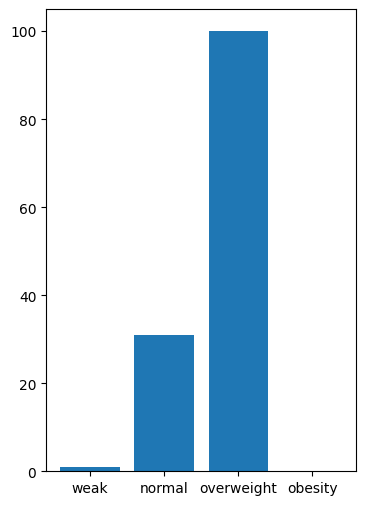

In [76]:
#전체 데이터 BMI 분포 확인
status = ['weak','normal', 'overweight','obesity']
status_indices = [0]*4

for num in df['BMI']:
    if num == 1:
        status_indices[0]+=1
    elif num==2:
        status_indices[1]+=1
    elif num==3:
        status_indices[2]+=1
    elif num==4:
        status_indices[3]+=1
    else:
        continue

print(status_indices)
plt.figure(figsize=(4,6))
plt.title = "BMI distribution"
plt.xlabel = status
plt.ylabel = status_indices
plt.bar(status,status_indices)
plt.show()

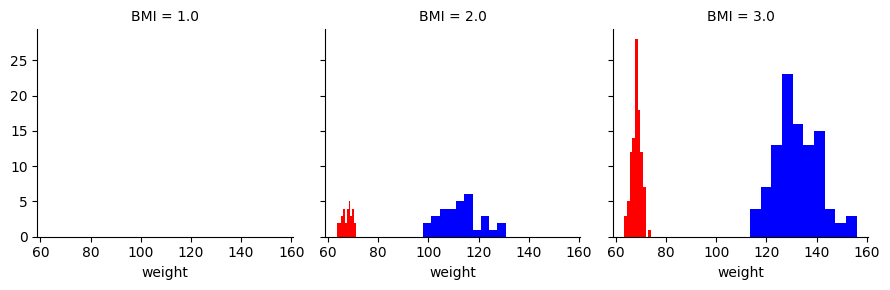

In [77]:
# BMI 값을 기준으로 seaborn.FacetGrid를 사용하여 히스토그램 그리기
grid = sns.FacetGrid(df, col="BMI", col_wrap=3)
grid.map(plt.hist, "height", bins=10, color="red")
grid.map(plt.hist, "weight", bins=10, color="blue")
plt.show()

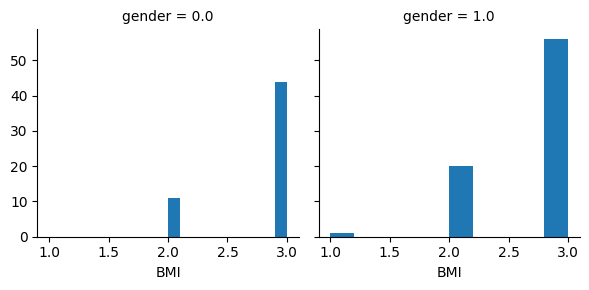

In [78]:
#gender에 따라서 BMI출력 0.0 : Male, 1.0 : Female.
bins = 10
facet = sns.FacetGrid(df, col='gender')
facet = facet.map(plt.hist, 'BMI', bins=bins)

In [79]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

#standardize the features, 정규화된 데이터.
s_x = StandardScaler().fit_transform(X)
s_x

array([[ 0.84515425, -1.01115731, -1.21469603, -1.19759885],
       [ 0.84515425,  0.15624297,  0.72158589,  2.11574955],
       [-1.18321596, -0.42745717,  0.08847827,  1.23089391],
       [ 0.84515425, -1.59485744, -0.14116477,  1.39324918],
       [ 0.84515425, -0.8165906 ,  0.34621146, -0.3443254 ],
       [-1.18321596, -1.40029073,  1.05148052,  0.74482127],
       [ 0.84515425,  0.35080968, -0.07966099, -1.24892817],
       [ 0.84515425,  0.35080968, -0.22925378, -1.10238055],
       [-1.18321596, -1.01115731,  0.13447221, -0.15328464],
       [-1.18321596, -0.23289046, -0.50065983, -0.41389558],
       [ 0.84515425,  0.15624297,  0.12225607, -0.94152329],
       [-1.18321596, -0.62202388,  1.62821504,  1.03740338],
       [-1.18321596, -1.20572402, -0.85175195,  0.16879404],
       [-1.18321596, -1.40029073,  1.70251336,  0.86401588],
       [ 0.84515425,  1.12907653, -0.49282994, -0.28287422],
       [-1.18321596, -0.8165906 , -0.11653969,  1.14360427],
       [ 0.84515425,  1.

In [80]:
#MinMaxScaler : 값이 0과 1을 나타내는 것이다.
m_x = MinMaxScaler().fit_transform(X)
m_x

array([[1.        , 0.17647059, 0.22505704, 0.26019699],
       [1.        , 0.52941176, 0.5701956 , 0.95048347],
       [0.        , 0.35294118, 0.45734537, 0.76613706],
       [1.        , 0.        , 0.41641194, 0.79996134],
       [1.        , 0.23529412, 0.50328582, 0.43796372],
       [0.        , 0.05882353, 0.62899869, 0.66487111],
       [1.        , 0.58823529, 0.42737487, 0.24950329],
       [1.        , 0.58823529, 0.40071024, 0.28003429],
       [0.        , 0.17647059, 0.46554371, 0.4777642 ],
       [0.        , 0.41176471, 0.35233263, 0.42346982],
       [1.        , 0.52941176, 0.4633662 , 0.31354649],
       [0.        , 0.29411765, 0.73180052, 0.72582621],
       [0.        , 0.11764706, 0.28975113, 0.54486447],
       [0.        , 0.05882353, 0.74504406, 0.68970352],
       [1.        , 0.82352941, 0.35372829, 0.45076615],
       [0.        , 0.23529412, 0.42080131, 0.74795157],
       [1.        , 0.82352941, 0.5205617 , 0.78689338],
       [1.        , 0.76470588,

In [81]:
#MaxAbsScaler -1과 1사이에 값으로 정해준다.
max_x = MaxAbsScaler().fit_transform(X)
max_x


array([[1.        , 0.6       , 0.89015369, 0.72478154],
       [1.        , 0.77142857, 0.93907625, 0.98157906],
       [0.        , 0.68571429, 0.92308   , 0.91299927],
       [1.        , 0.51428571, 0.91727779, 0.92558245],
       [1.        , 0.62857143, 0.92959195, 0.79091359],
       [0.        , 0.54285714, 0.94741145, 0.87532673],
       [1.        , 0.8       , 0.91883176, 0.72080332],
       [1.        , 0.8       , 0.91505211, 0.73216133],
       [0.        , 0.6       , 0.9242421 , 0.80572   ],
       [0.        , 0.71428571, 0.9081947 , 0.78552162],
       [1.        , 0.77142857, 0.92393344, 0.7446284 ],
       [0.        , 0.65714286, 0.96198337, 0.898003  ],
       [0.        , 0.57142857, 0.89932392, 0.83068236],
       [0.        , 0.54285714, 0.9638606 , 0.88456478],
       [1.        , 0.91428571, 0.90839253, 0.79567629],
       [0.        , 0.62857143, 0.91789997, 0.90623398],
       [1.        , 0.91428571, 0.93204077, 0.92072096],
       [1.        , 0.88571429,

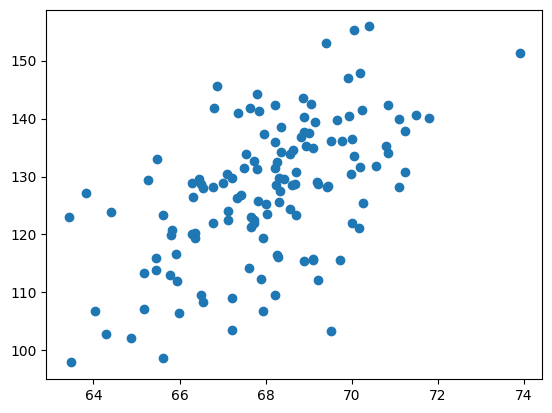

In [82]:
plt.scatter(df['height'],df['weight'])
plt.show()

(132, 1)
(132, 1)
intercept : [-118.44861192]
Slope: [[3.61361322]]


TypeError: 'list' object is not callable

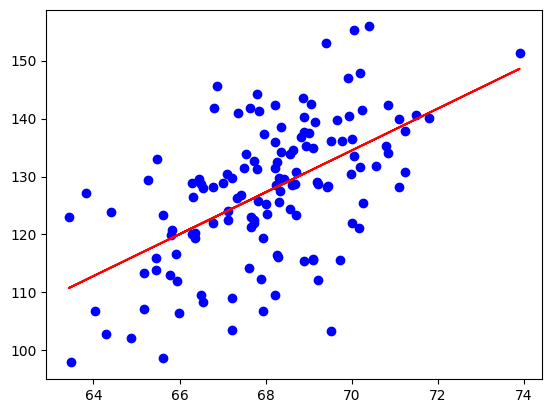

In [96]:
import matplotlib.pyplot as plt
#Linear regression model 만들기.
#np.array로 바꾸기.
X = df.loc[:,'height'].to_numpy()
Y = df.loc[:,'weight'].to_numpy()

#X와 Y를 2차원 데이터로 변환.
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

#X data Y data 같은 개수인 거 확인
print(X.shape)
print(Y.shape)

model = LinearRegression().fit(X,Y)

#print the intercept 절편 구하기.
print('intercept :', model.intercept_)

#print the Slope 기울기 구하기.
print("Slope:",model.coef_) 

plt.scatter(X,Y, color = 'blue', label = 'Data Points')
plt.plot(X, model.predict(X), color = 'red', label = 'Regression line')

plt.xlabel('height')
plt.ylabel('weight')
plt.title('Linear Regression')
plt.legend()

# 그래프 출력
plt.show()


In [97]:
#Predict data. x data는 height
x_arr = []
#weight가 null값이 있는 경우.
#이 때의 index를 이용하여 height 자료를 2d로 전환을 하여 w_predict에 저장을 한다.
x_arr = dataset.loc[w_indices, 'height'].values.reshape(-1, 1)
x_arr = np.array(x_arr).reshape(-1,1) #2d로 전환을 한다.

#예측된 값 (4,1로 저장)
w_predict = model.predict(x_arr) 

w_predict

#2차원 배열 w_predict
for i, index in enumerate(w_indices):
    dataset.at[index,'weight'] = w_predict[i]

dataset.isna().sum()

gender    0
age       0
height    4
weight    0
BMI       5
dtype: int64

In [98]:
#Predict data, y data는 weight.
# y = ax + b, x가 null값일 때 x의 값을 구하는 식은 y-b/a
#model_coef_는 a, model_intercept_는 절편

h_indices #height가 NaN인 값, 우리는 weight의 절편을 가지고 있다.
y_arr = []
y_arr = dataset.loc[h_indices,'weight'].values
y_arr = np.array(y_arr)

h_predict=(y_arr-model.intercept_)/model.coef_

h_predict = h_predict.reshape(-1,1)
#2차원 배열 w_predict
for i, index in enumerate(h_indices):
    dataset.at[index,'height'] = h_predict[i]

dataset.isna().sum() #Outlier data들은 없어졌다.

gender    0
age       0
height    4
weight    0
BMI       5
dtype: int64

In [99]:
dataset.head(30)

,gender,age,height,weight,BMI
0,1.0,21,65.783310,112.99250,2.0
1,1.0,35,NaN,136.48730,3.0
2,1.0,27,69.398740,153.02690,3.0
3,0.0,24,68.216600,142.33540,3.0
4,1.0,18,67.787810,144.29710,3.0
5,1.0,22,68.697840,123.30240,2.0
6,0.0,35,69.802040,141.49470,NaN
7,0.0,19,70.014720,136.46230,3.0
8,1.0,28,67.902650,112.37230,2.0
9,0.0,25,NaN,120.66720,3.0


In [ ]:
'''
데이터를 mean값으로 missing data 처리.
mean_height = df['height'].mean()
df['height'].fillna(mean_height, inplace=True)
'''

#df['BMI'].fillna(bmi(df['weight'],df['height']),inplace=True)

"\n데이터를 mean값으로 missing data 처리.\nmean_height = df['height'].mean()\ndf['height'].fillna(mean_height, inplace=True)\n"

In [ ]:
df.isna().sum()

gender    0
age       0
height    0
weight    0
BMI       0
dtype: int64

In [ ]:
print(df.head(20))

    gender  age      height    weight  BMI
0      1.0   21   65.783310  112.9925  2.0
1      1.0   35         NaN  136.4873  3.0
2      1.0   27   69.398740  153.0269  3.0
3      0.0   24   68.216600  142.3354  3.0
4      1.0   18   67.787810  144.2971  3.0
5      1.0   22   68.697840  123.3024  2.0
6      0.0   35   69.802040  141.4947  NaN
7      0.0   19   70.014720  136.4623  3.0
8      1.0   28   67.902650  112.3723  2.0
9      0.0   25         NaN  120.6672  3.0
10     0.0   34    0.000000  127.4516  NaN
11     1.0   28   67.623330  114.1430  2.0
12     0.0   21   68.302480  125.6107  3.0
13     0.0   25   67.116560  122.4618  3.0
14     1.0   27   68.279670  116.0866  2.0
15     0.0   23   71.091600  139.9975  3.0
16     0.0   20   66.461000  129.5023  3.0
17     1.0   31 -104.420555  142.9733  3.0
18     0.0   19   71.230330  137.9025  3.0
19     1.0   32   67.131180  124.0449  3.0


In [ ]:
#BMI요소에 미치는 영향들을 분석하는 그래프 seaborn.
sns.pairplot(dataset_encoded, hue='BMI')
plt.show()

df2 = dataset_encoded.values

X = df[:,0:4]
Y = df[:,4]



NameError: name 'dataset_encoded' is not defined